# Credit Card Fraud Detection

It is really important to detect any Credit Card Fraud taking place. The credit card companies need to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In this kernel, I have worked on the Credit Card Fraud Detection dataset. The dataset was taken from Kaggle.com.
Here, I have performed exploratory data analysis, undersampling and predictive modelling.

<b> Importing the libraries

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD
#import matplotlib.patches as mpatches
#import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
#from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset in credit_data
credit_data = pd.read_csv('/Users/ashutoshshanker/Downloads/creditcard.csv')

In [3]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Columns in the dataset
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<b> Data Preprocessing

In [5]:
# Finding the count and percentage of missing values
missing_data = pd.DataFrame([credit_data.isnull().sum(), credit_data.isnull().sum()* 100.0/credit_data.shape[0]]).T
missing_data.columns = ['missing_count', 'missing_percentage']
missing_data

,missing_count,missing_percentage
Time,0.0,0.0
V1,0.0,0.0
V2,0.0,0.0
V3,0.0,0.0
V4,0.0,0.0
V5,0.0,0.0
V6,0.0,0.0
V7,0.0,0.0
V8,0.0,0.0
V9,0.0,0.0


In [6]:
# Summary Statistics of the dataset
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
# Count of fraudulent and non-fraudulent transactions
credit_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are 492 fraud cases and 284315 non-fraud cases. This shows that the dataset is unbalanced and so, for the purpose of prediction, we need to have a equal distribution of both fraud and non-fraud cases.

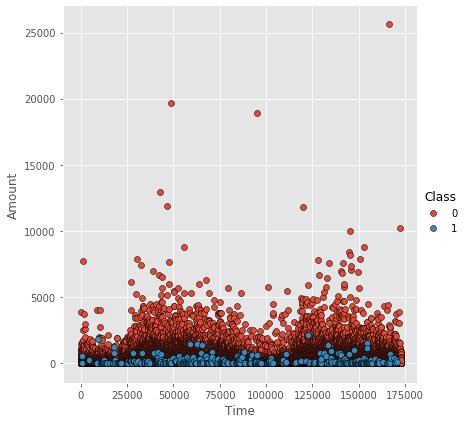

In [8]:
# Plot showing fraudulent and non-fraudulent transactions 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(credit_data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

# Correlation between the columns

In [9]:
# Correlation between the columns
credit_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


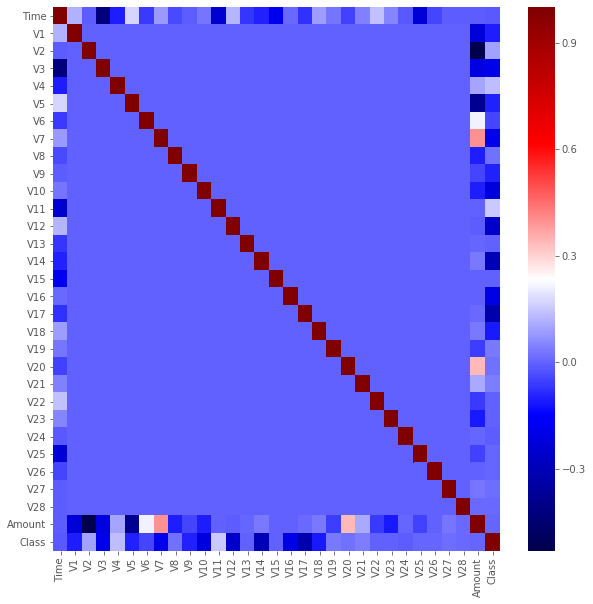

In [10]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=credit_data.corr(), cmap="seismic")
plt.show();


# Pearson's Correlation

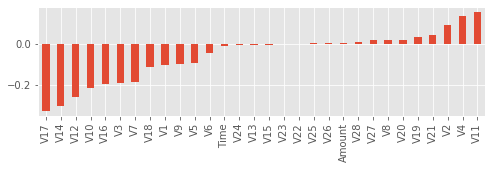

In [11]:
plt.figure(figsize=(8,2))
credit_data.corr()['Class'].sort_values()[:-1].plot(kind='bar')
plt.show()

# Distribution
Here, we will find the distribution to understand the skewness of data in amount and time column

(0.0, 172792.0)

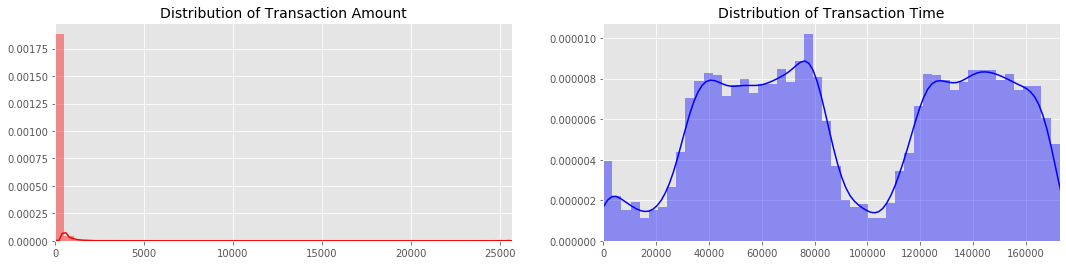

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_data['Amount'].values
time_val = credit_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color = 'b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [13]:
# Record Counts
credit_data.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

<b> Histogram Plot

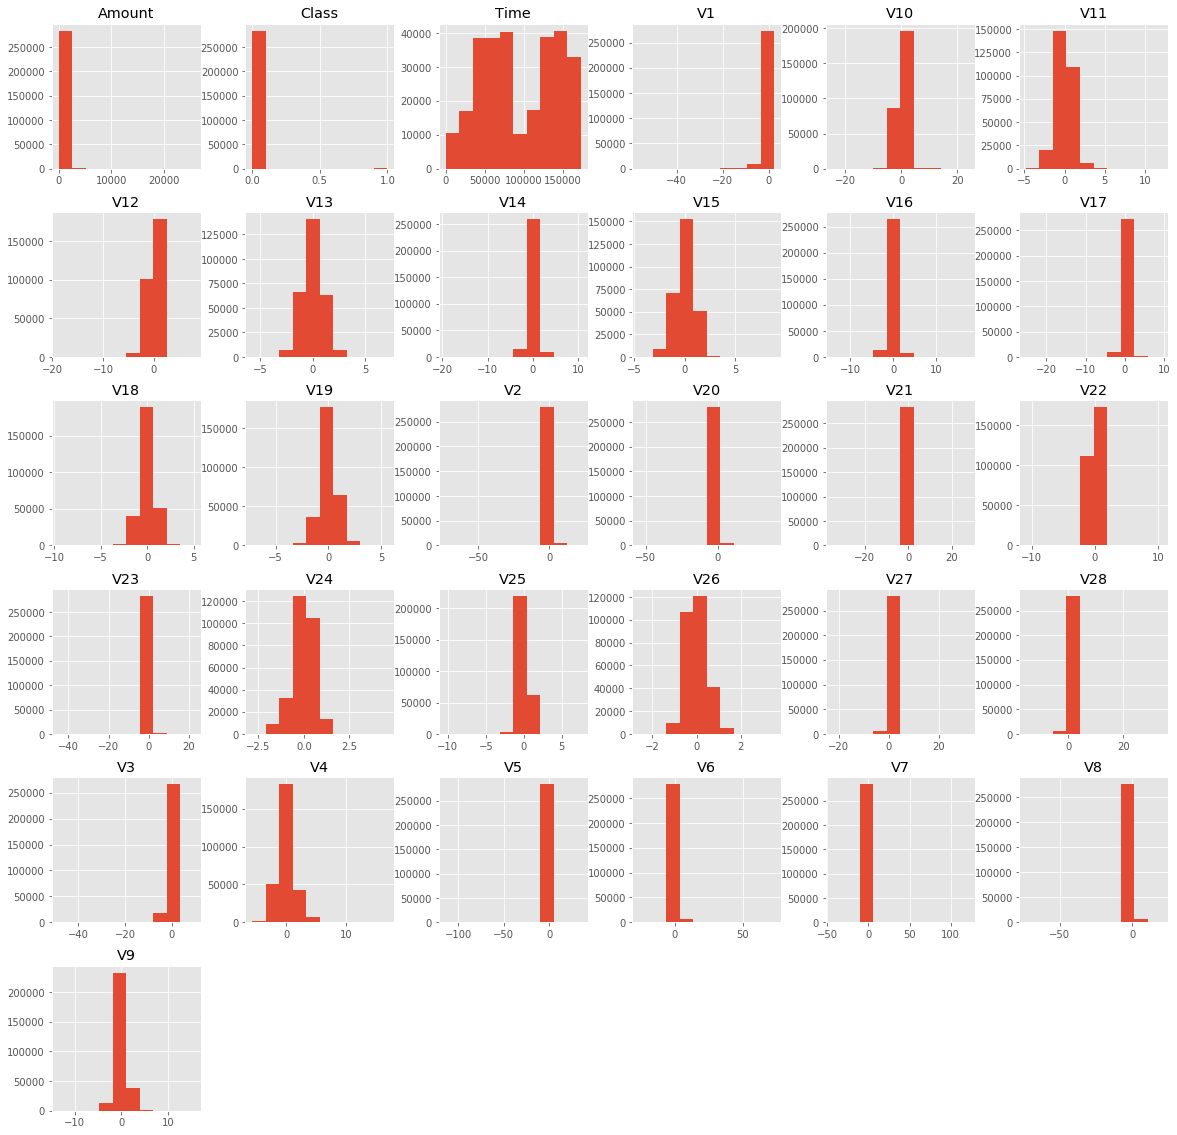

In [14]:
# Histogram Plot
credit_data.hist(figsize=(20, 20));

<b> Boxplot

In [15]:
data_box=credit_data.drop('Class',axis=1)

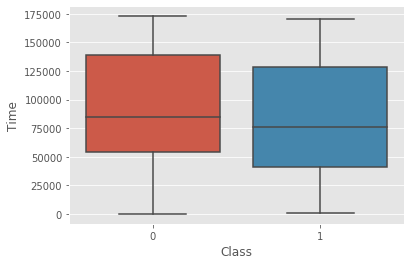

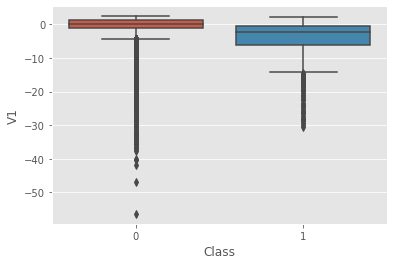

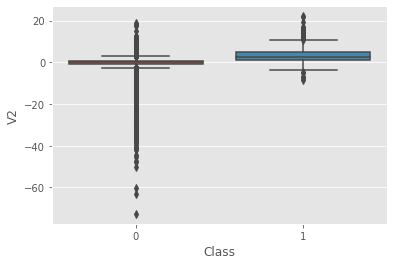

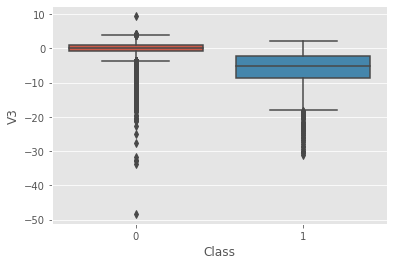

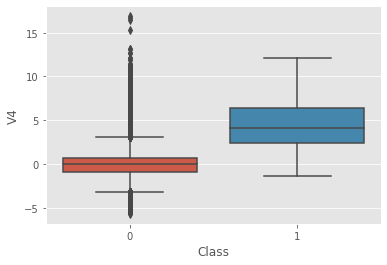

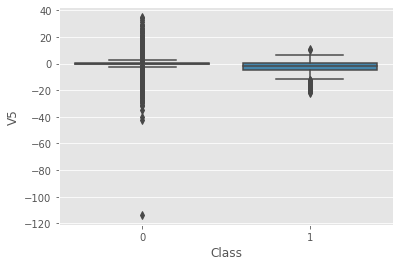

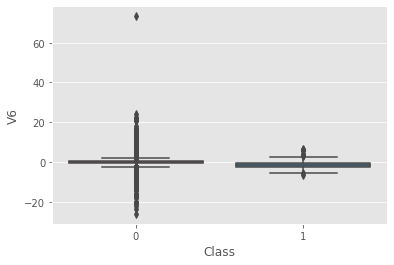

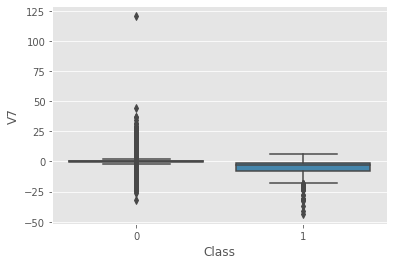

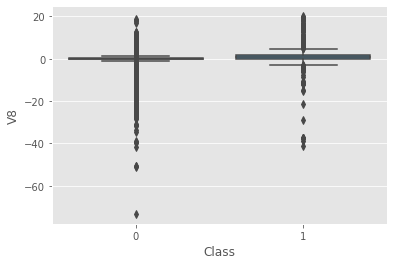

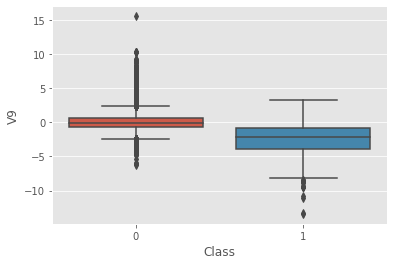

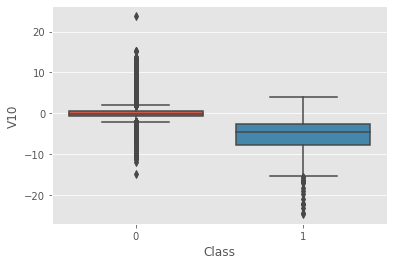

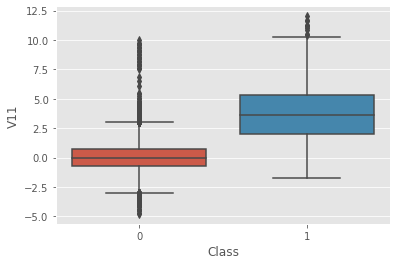

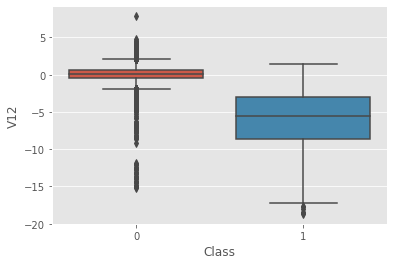

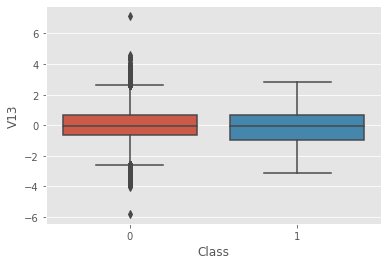

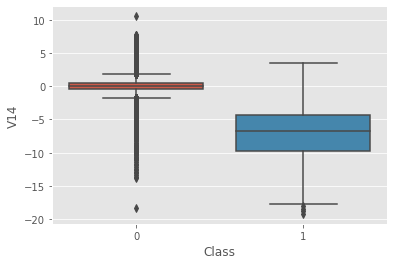

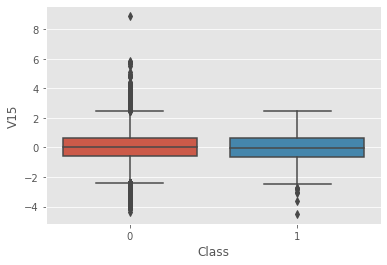

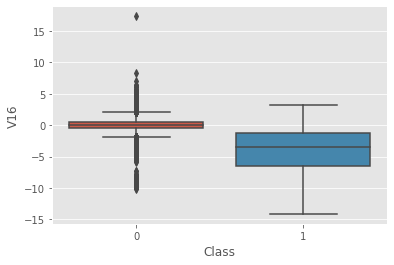

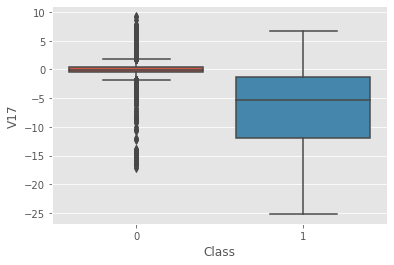

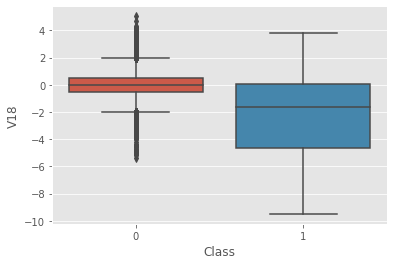

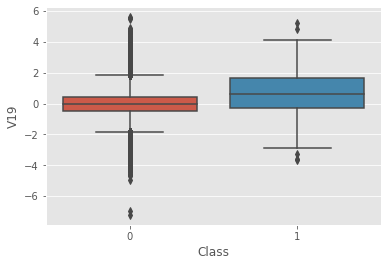

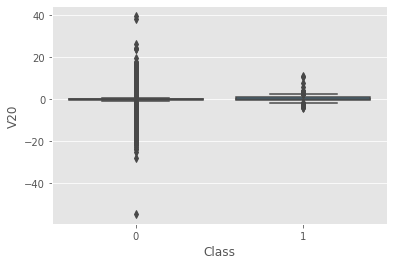

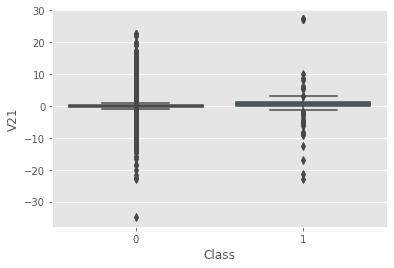

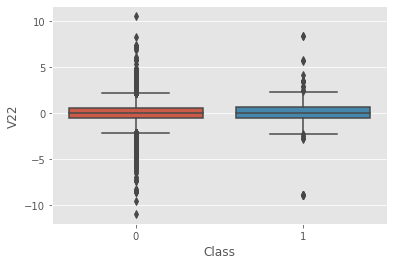

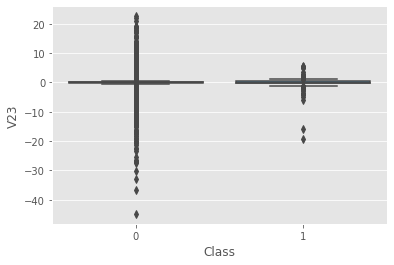

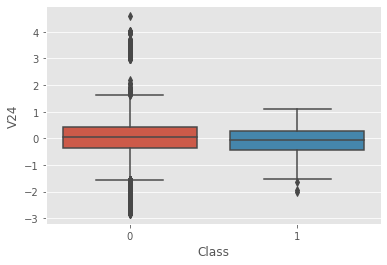

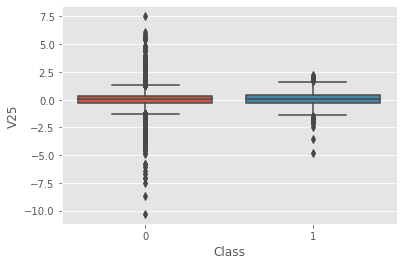

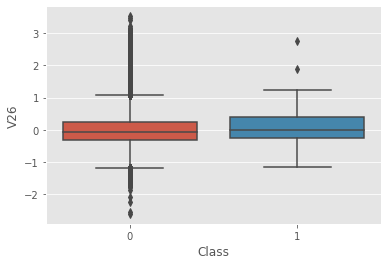

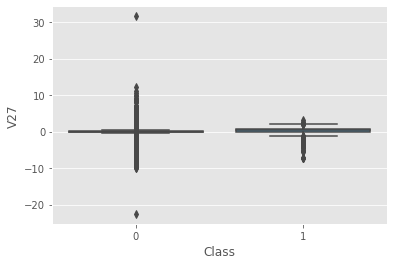

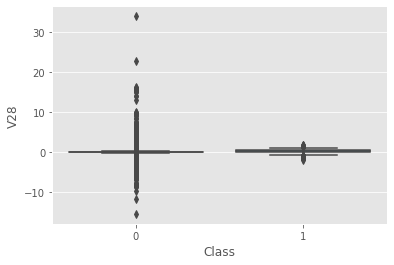

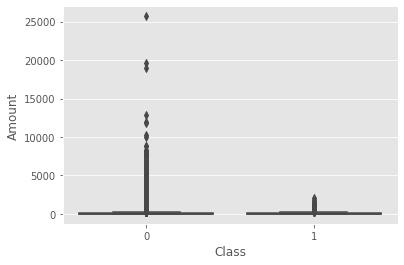

In [16]:
# distribution of the features and target
cols= list(data_box.columns)
for i in cols:
    sns.boxplot(y=i,x=credit_data['Class'],data=data_box)
    plt.show()

<b> Since most of the columns has already been scaled we should scale the columns that are left to scale i.e. Amount and Time columns

In [17]:
# Scaling the columns using StandardScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers. So, here we will use RobustScaler.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

credit_data['scaled_amount'] = rob_scaler.fit_transform(credit_data['Amount'].values.reshape(-1,1))
credit_data['scaled_time'] = rob_scaler.fit_transform(credit_data['Time'].values.reshape(-1,1))

credit_data.drop(['Time','Amount'], axis=1, inplace=True)

# Distribution of fradulent and non-fraudulent data

In [18]:
# Percentage of fradulent and non-fraudulent data
pd.DataFrame(credit_data["Class"].value_counts(), credit_data["Class"].value_counts()*100/len(credit_data["Class"]))

,Class
Class,
99.827251,NaN
0.172749,NaN


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

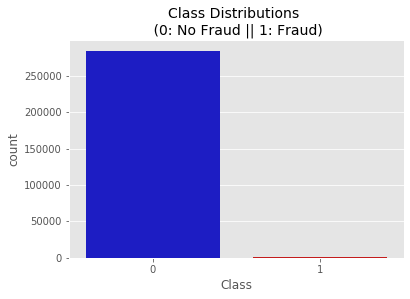

In [19]:
# Bar plot showing the class ditribution before undersampling
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=credit_data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Undersampling the data:

To balance the data undersampling is performed.

Since, there are 492 fraud cases and 284315 non-fraud cases, the dataset is unbalanced and so, for the purpose of prediction, we need to have a equal distribution of both fraud and non-fraud cases. 

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss 

In [20]:
X = credit_data.ix[:, credit_data.columns != 'Class']
y = credit_data.ix[:, credit_data.columns == 'Class']

In [21]:
# Number of data points in the minority class
number_records_fraud = len(credit_data[credit_data.Class == 1])
fraud_indices = np.array(credit_data[credit_data.Class == 1].index)

# Picking the indices of the non-fraudulent classes
normal_indices = credit_data[credit_data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = credit_data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

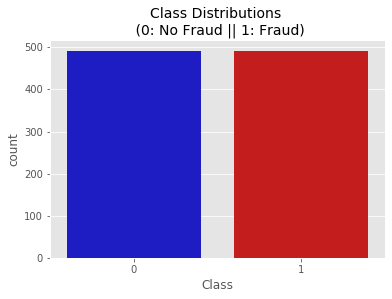

In [22]:
# Bar plot showing the class ditribution after undersampling
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=under_sample_data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Data Prediction

In [23]:
# Dividing the dataset into training and testing data:

X = credit_data.drop('Class', axis = 1)
Y = credit_data.Class


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)

# Weight of transaction
#wp = y_train.value_counts()[0] / len(y_train)
#wn = y_train.value_counts()[1] / len(y_train)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {X_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"X_train_undersample: {X_train_undersample.shape}")
print(f"X_test_undersample: {X_test_undersample.shape}")
print(f"y_train_undersample: {y_train_undersample.shape}")
print(f"y_test_undersample: {y_test_undersample.shape}")

X_train: (199364, 30)
X_test: (85443, 30)
y_train: (199364, 30)
y_test: (85443, 1)
X_train_undersample: (688, 30)
X_test_undersample: (296, 30)
y_train_undersample: (688, 1)
y_test_undersample: (296, 1)


# Logistic Regression

<b> Logistic Regression on original data

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


<b> Logistic Regression on undersampled data

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train_undersample, y_train_undersample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Accuracy of model
y_pred_undersample = logreg.predict(X_test_undersample)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_undersample, y_test_undersample)))

Accuracy of logistic regression classifier on test set: 0.95


In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
print(confusion_matrix)

[[144   5]
 [ 10 137]]


In [29]:
# Calculating the precision, recall, f1-score, and support
from sklearn.metrics import classification_report
print(classification_report(y_test_undersample, y_pred_undersample))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       149
           1       0.96      0.93      0.95       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



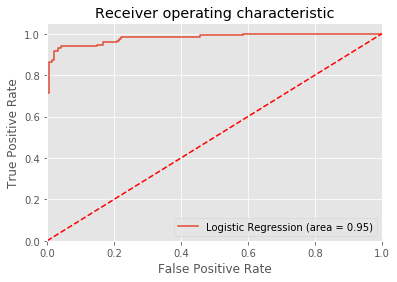

In [30]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_undersample, logreg.predict(X_test_undersample))
fpr, tpr, thresholds = roc_curve(y_test_undersample, logreg.predict_proba(X_test_undersample)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [32]:
# Decision tree model on original dataset
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_pred_dt = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

# Calculating the precision, recall, f1-score, and support
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[85270    26]
 [   36   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<b> Decision Tree on undersampled data

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_undersample, y_train_undersample)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
y_pred_undersample_dt = classifier.predict(X_test_undersample)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_undersample, y_pred_undersample_dt))

# Calculating the precision, recall, f1-score, and support
print(classification_report(y_test_undersample, y_pred_undersample_dt))

Confusion Matrix:
[[131  18]
 [  9 138]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       149
           1       0.88      0.94      0.91       147

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



# Naive Bayes

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

In [39]:
# Naive Bayes on original Data
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred_NB = model.predict(X_test)
y_pred_NB

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
accuracy = accuracy_score(y_test,y_pred_NB)*100
accuracy

97.84651756141521

In [42]:
# Naive Bayes on undersampled Data
model.fit(X_train_undersample, y_train_undersample)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred_undersample_NB = model.predict(X_test_undersample)
y_pred_undersample_NB

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [44]:
accuracy_undersample = accuracy_score(y_test_undersample,y_pred_undersample_NB)*100
accuracy_undersample

90.87837837837837

# SVM

In [45]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#SVM on original dataset takes long time to run hence, I have commented this code:
# SVM on original dataset
#Train the model using the training sets
#clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred_svm = clf.predict(X_test)


In [ ]:
#Accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
#Precision_svm = metrics.precision_score(y_test, y_pred)
#Recall_svm = metrics.recall_score(y_test, y_pred)

In [46]:
# SVM on undersampled dataset
#Train the model using the training sets
clf.fit(X_train_undersample, y_train_undersample)

#Predict the response for test dataset
y_pred_undersample_svm = clf.predict(X_test_undersample)

In [47]:
# Calculating Accuracy, Precision, and Recall
Accuracy_svm = metrics.accuracy_score(y_test_undersample, y_pred_undersample_svm)
Precision_svm = metrics.precision_score(y_test_undersample, y_pred_undersample_svm)
Recall_svm = metrics.recall_score(y_test_undersample, y_pred_undersample_svm)

# Accuracy
Accuracy_svm

0.9459459459459459

In [48]:
# Precision
Precision_svm


0.9645390070921985

In [49]:
# Recall
Recall_svm

0.9251700680272109

# Neural Network

In [50]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [51]:
# Neural Network on original dataset
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
y_pred_NN = clf.predict(X_test)

In [53]:
# Accuracy
Accuracy_NN = metrics.accuracy_score(y_test, y_pred_NN)
Accuracy_NN

0.9993562960102056

In [54]:
# Neural Network on undersampled data
clf.fit(X_train_undersample, y_train_undersample)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
y_pred_undersample_NN = clf.predict(X_test_undersample)

In [56]:
# Accuracy
Accuracy_undersample_NN = metrics.accuracy_score(y_test_undersample, y_pred_undersample_NN)
Accuracy_undersample_NN

0.9087837837837838

It can be observed that the accuracy is more for original data in each case. This is caused due to the unbalanced data in the 'Class' column. 

# Performing Feature Selection

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [58]:
feat_labels = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
       'scaled_amount', 'scaled_time']

In [59]:
# For undersample
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_undersample, y_train_undersample)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('V1', 0.012235316082691464)
('V2', 0.024105616694564385)
('V3', 0.04321729898325498)
('V4', 0.10755443991955285)
('V5', 0.008924441379474367)
('V6', 0.009140825751025058)
('V7', 0.03974469971236094)
('V8', 0.009847747084283976)
('V9', 0.012730284730909109)
('V10', 0.14200202220543337)
('V11', 0.06925036390182959)
('V12', 0.09786992944096501)
('V13', 0.006139217518389599)
('V14', 0.1635099648295267)
('V15', 0.008420650798505553)
('V16', 0.03878624723433412)
('V17', 0.08130298069196677)
('V18', 0.012348599126607152)
('V19', 0.013658399709916233)
('V20', 0.01230029821925767)
('V21', 0.018109396169949638)
('V22', 0.0059904271786474185)
('V23', 0.008366698917947033)
('V24', 0.004804551379730843)
('V25', 0.005401925126833466)
('V26', 0.00900338221330009)
('V27', 0.011730921661103955)
('V28', 0.007263482720945363)
('scaled_amount', 0.010953248105163923)
('scaled_time', 0.0052866225115292724)


In [60]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train_undersample, y_train_undersample)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [61]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

V14


In [62]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train_undersample = sfm.transform(X_train_undersample)
X_important_test_undersample = sfm.transform(X_test_undersample)

In [63]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train_undersample, y_train_undersample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
# Apply The Full Featured Classifier To The Test Data
y_pred_undersample = clf.predict(X_test_undersample)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test_undersample, y_pred_undersample)

0.9459459459459459

In [65]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_undersample = clf_important.predict(X_important_test_undersample)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test_undersample, y_important_pred_undersample)

0.8851351351351351

In [ ]:
# conda install -c conda-forge imbalanced-learn

# References:

1. https://www.kaggle.com/mlg-ulb/creditcardfraud
2. https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets